Interactive version of the graph from [A/B Tests for Engineers](https://win-vector.com/2023/10/15/a-b-tests-for-engineers/).

To see the interaction: download [directory](https://github.com/WinVector/Examples/tree/main/ab_test) and run this Jupyter notebook in JupyterLab or VSCode.

[Jupyter Widgets documentation](https://ipywidgets.readthedocs.io/en/latest/index.html)

In [1]:
# import our modules
import numpy as np
import pandas as pd
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from sig_pow_visual import composite_graphs_using_PIL, graph_factory
from data_algebra import RecordSpecification
import PIL
from PIL import Image, ImageDraw, ImageFont

import ipywidgets as widgets

In [2]:
# our specification of interest
# derived from the above
n = 557  # the experiment size
r = 0.1  # the assumed large effect size (difference in conversion rates)
t = 0.061576 # the correct threshold for specified power and significance


In [3]:
mk_graphs = graph_factory(
    n=n,  # the experiment size
    r=r,  # the assumed large effect size (difference in conversion rates)
)

In [4]:
# sig_area, mpow_area are calculated in make_graphs

def sig_pow_text_monochrome(sig_area, mpow_area, img_size=(480, 180), fontsize=24):
    img_t = PIL.Image.new("RGB", img_size, "white")
    draw = ImageDraw.Draw(img_t)

    fnt = ImageFont.truetype("Verdana.ttf", fontsize)

    textlabels = "False Positive Rate:\nFalse Negative Rate:"
    textvalues = f"{sig_area:.3f}\n{mpow_area:.3f}"

    value_xoffset = fnt.getlength("False Negative Rate:") + 5

    draw.multiline_text((0,0), textlabels, font=fnt, fill=(0,0,0), align='right')
    draw.multiline_text((value_xoffset, 0), textvalues, font=fnt, fill=(0,0,0), align='left')
    return img_t


def sig_pow_text_color(sig_area, mpow_area, img_size=(480, 180), fontsize=24):
    # these are the colors in binomial_diff_sig_pow_visual
    # converted to (R, G, B)
    assumed_no_effect_color = (241, 163, 64) # '#f1a340',
    assumed_large_effect_color = (153, 142, 195) # '#998ec3'

    img_t = PIL.Image.new("RGB", img_size, "white")
    draw = ImageDraw.Draw(img_t)

    fnt = ImageFont.truetype("Verdana.ttf", 24)

    textlabels = "False Positive Rate:\nFalse Negative Rate:"
    significance = f"{sig_area:.3f}"
    mpow = f"{mpow_area:.3f}"

    value_xoffset = fnt.getlength("False Negative Rate:") + 5
    bb = fnt.getbbox(significance) 
    # (left, top, right, bottom)
    # multiline_text by default puts 4 pixel spacing between lines

    draw.multiline_text((0,0), textlabels, font=fnt, fill=(0,0,0), align='right')
    draw.text((value_xoffset, 0), significance, font=fnt, fill=assumed_no_effect_color)
    draw.text((value_xoffset, bb[3]+4), mpow, font=fnt, fill=assumed_large_effect_color)
    return img_t

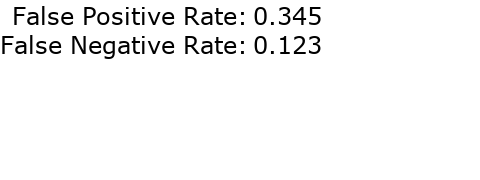

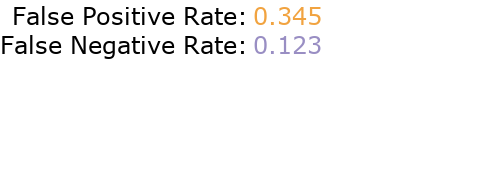

In [5]:
# just to test non-round numbers
sig = 0.345
mpow = 0.123

display(sig_pow_text_monochrome(sig, mpow))

display(sig_pow_text_color(sig, mpow))

